# Financial Fraud Detection

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("Fraud_Dataset.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,NaN,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


### Libraries Used

1. **pandas**:
   - Purpose: Data manipulation and analysis, especially for handling and analyzing structured data in DataFrames.

2. **numpy**:
   - Purpose: Numerical computing, providing support for arrays, mathematical functions, and random number generation.

3. **matplotlib**:
   - Purpose: Data visualization, creating static, animated, and interactive visualizations in Python.

4. **seaborn**:
   - Purpose: Statistical data visualization, built on top of `matplotlib` to provide a high-level interface for drawing attractive and informative statistical graphics.

5. **scikit-learn**:
   - Purpose: Machine learning library that provides simple and efficient tools for data mining and data analysis, including algorithms for classification, regression, clustering, and more.


In [25]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048504e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114172e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416338e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182928e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149910e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### Attributes and their brief description

#### Nominal Attributes
type: This is likely a categorical variable (e.g., 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT').
nameOrig, nameDest: These are likely unique identifiers for the origin and destination accounts. They are nominal (categorical) attributes and may not have any direct numerical meaning but might be useful for identifying transactions.

#### Numeric Attributes
step: Represents the time step of the transaction, likely indicating the sequence of transactions (e.g., a time counter).
amount: The amount of money involved in the transaction.
oldbalanceOrg: The balance of the originating account before the transaction.
newbalanceOrig: The balance of the originating account after the transaction.
oldbalanceDest: The balance of the destination account before the transaction.
newbalanceDest: The balance of the destination account after the transaction.

#### Binary Attribute
isFraud: This is the target variable that indicates whether the transaction is fraudulent or not (0 = not fraud, 1 = fraud).



### Categorizing into different types of attributes

In [26]:
attribute_types = data.dtypes

nominal_attributes = []
numeric_attributes = []
binary_attributes = []

for column, dtype in attribute_types.items():
    if dtype == 'object':
        nominal_attributes.append(column)
    elif dtype == 'int64' or dtype == 'float64':
        if len(data[column].unique()) == 2:
            binary_attributes.append(column)
        else:
            numeric_attributes.append(column)

print("Nominal Attributes:", nominal_attributes)
print("Numeric Attributes:", numeric_attributes)
print("Binary Attributes:", binary_attributes)

Nominal Attributes: ['type', 'nameOrig', 'nameDest']
Numeric Attributes: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Binary Attributes: ['isFraud']


### Data Distribution

#### Histograms

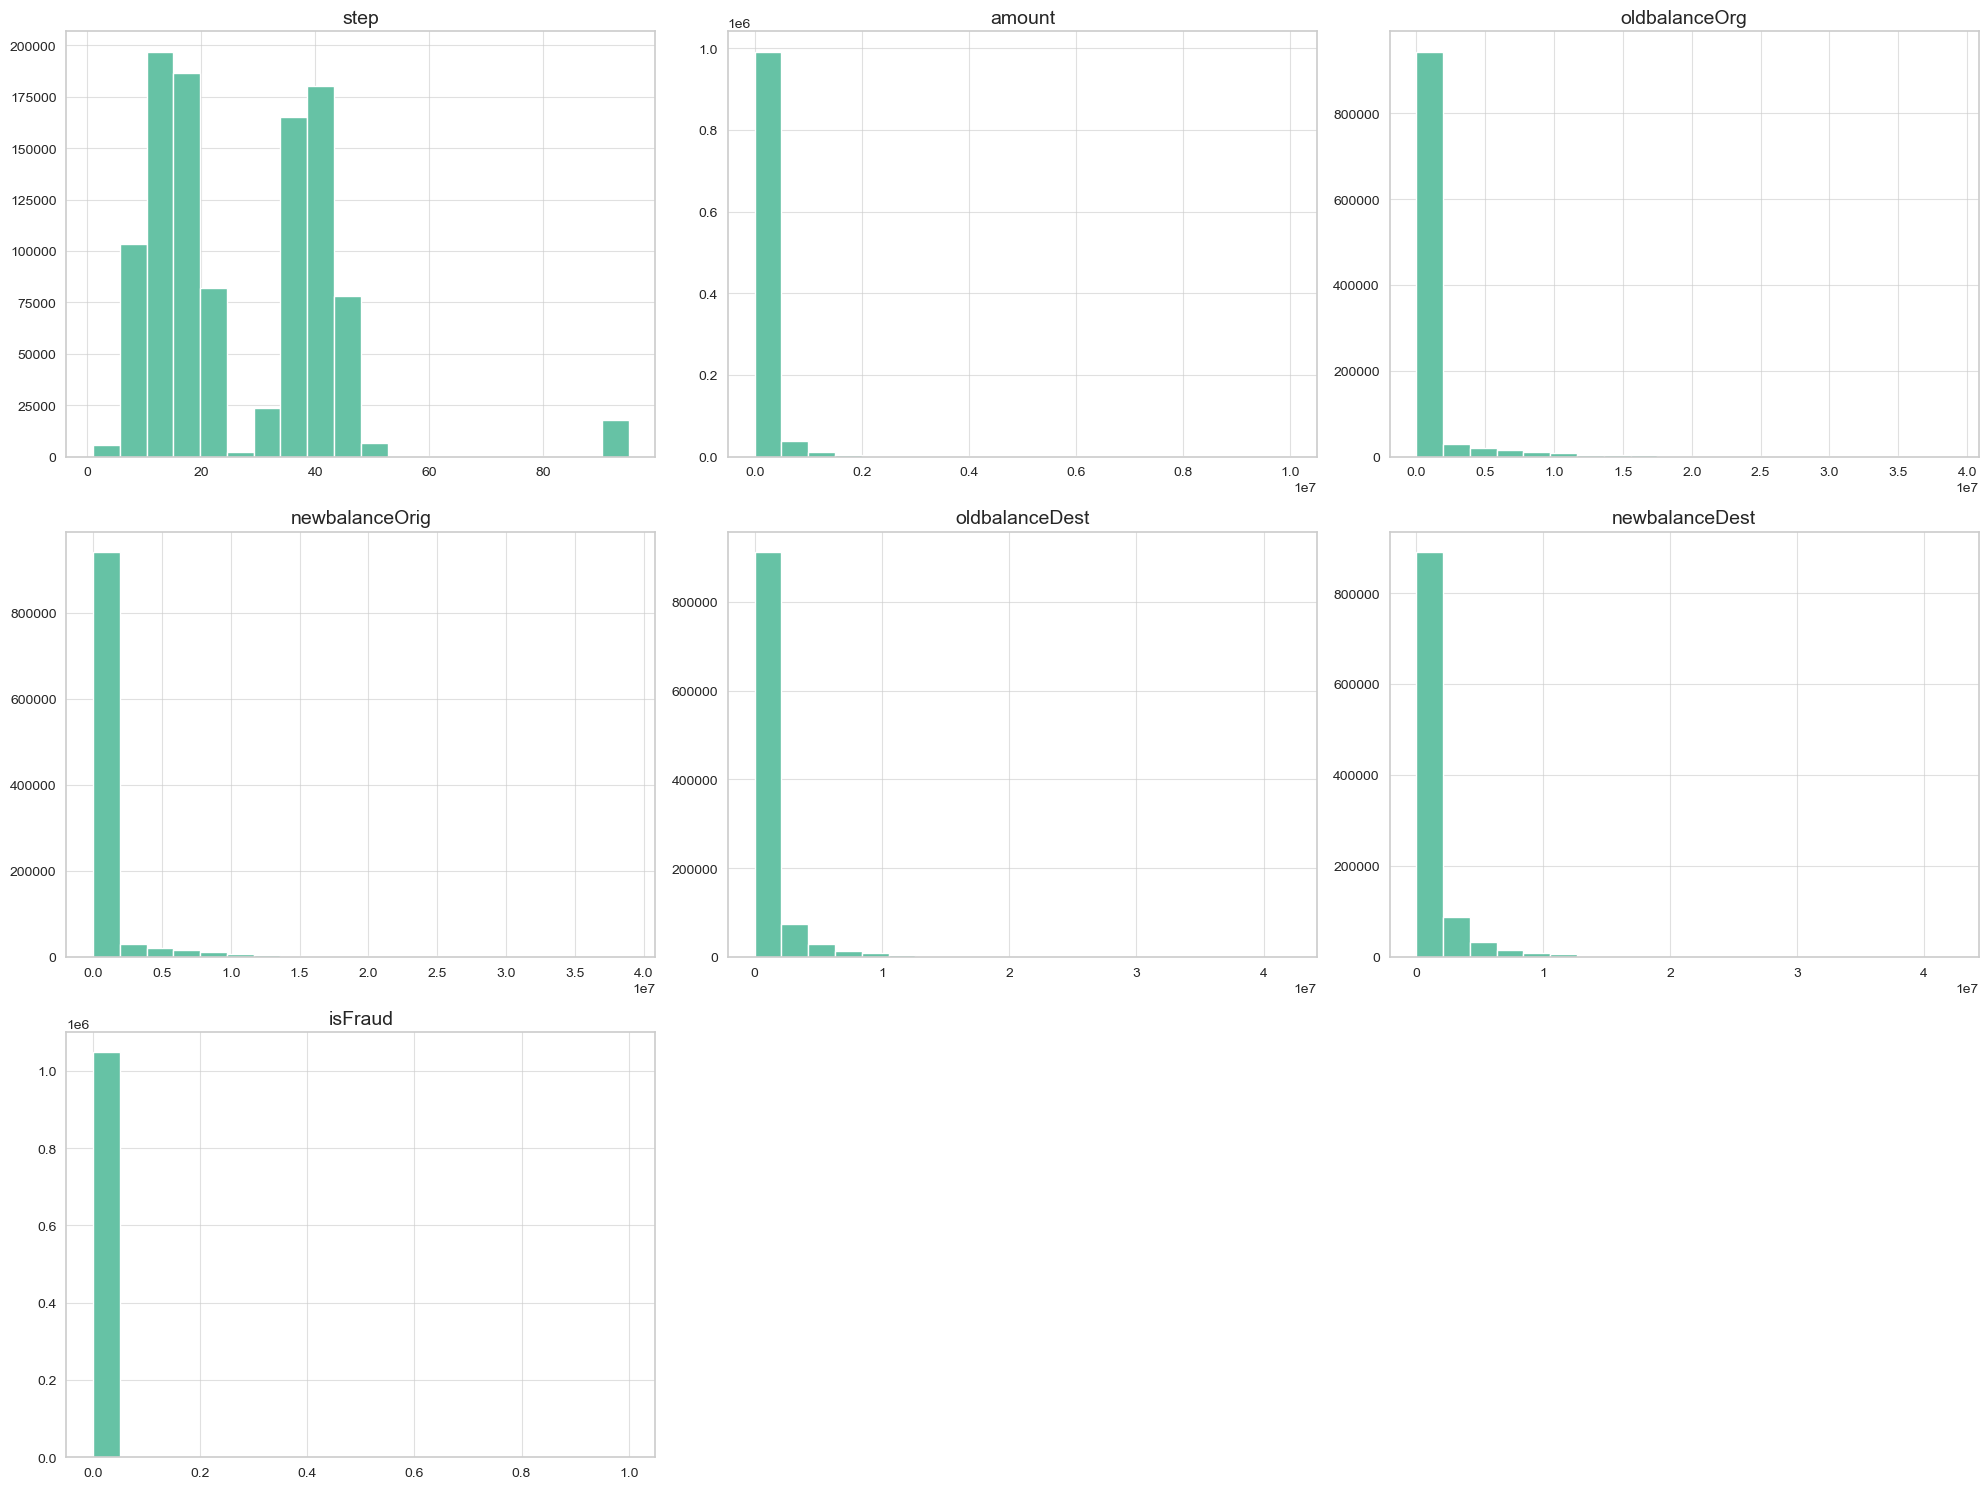

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data_without_nulls = pd.read_csv("Fraud_Dataset.csv")

# Drop the non-numeric columns
numeric_data = data_without_nulls.drop(columns=['type', 'nameOrig', 'nameDest'])

# Generate histograms for all numeric columns
numeric_data.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

#### Boxplots

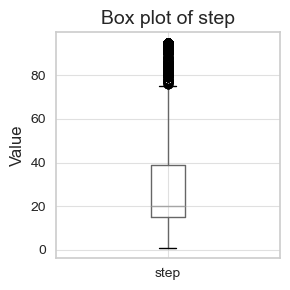

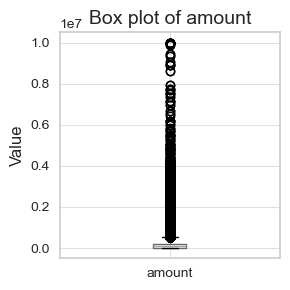

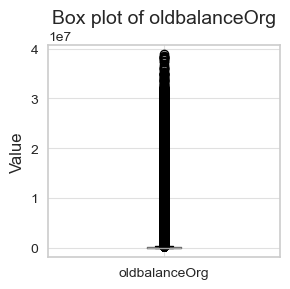

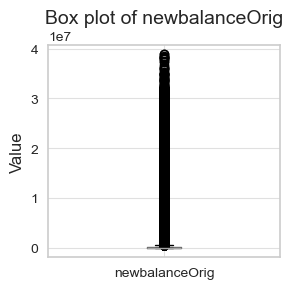

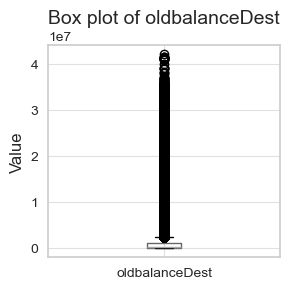

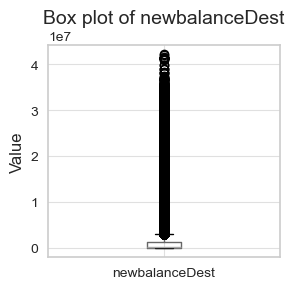

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical attributes to plot
numerical_attributes = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Generate box plots for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(3, 3))
    data_without_nulls.boxplot(column=attribute)
    plt.title(f'Box plot of {attribute}')
    plt.ylabel('Value')
    plt.show()

#### Pie chart for target attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048504 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


None

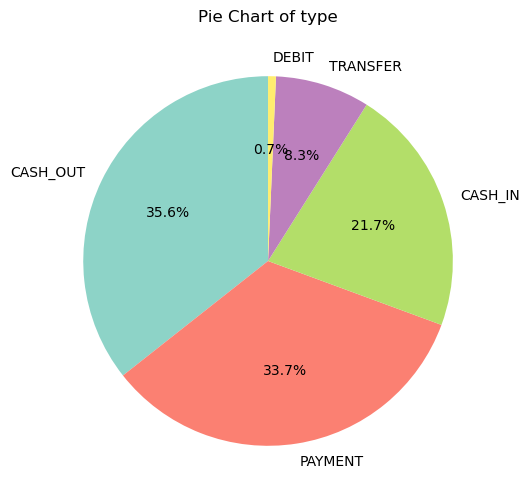

In [ ]:
# Display basic information about the dataset
display(data.info())

# Identify numerical columns
numerical_attributes = data.select_dtypes(include=['number']).columns.tolist()

# Generate pie chart for categorical attributes
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()

for attribute in categorical_attributes:
    plt.figure(figsize=(8, 6))
    data[attribute].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Pie Chart of {attribute}')
    plt.ylabel('') 
    plt.show()

#### Bar graphs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048504 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB
None


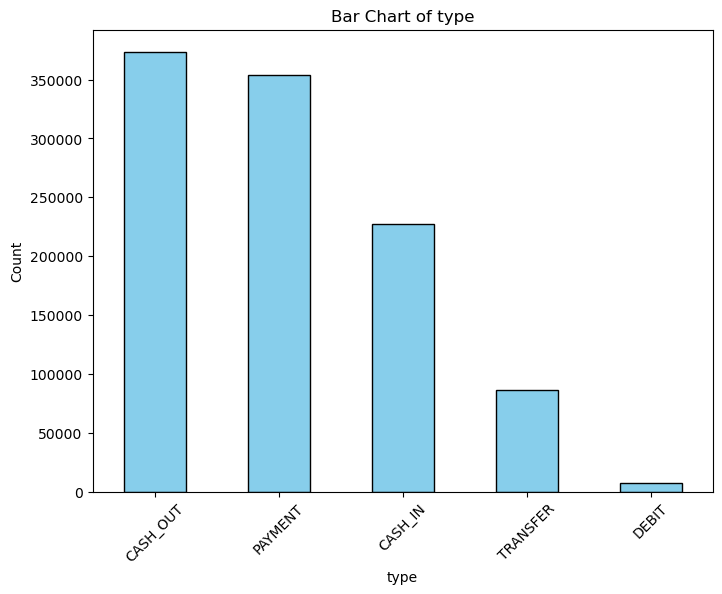

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_csv("Fraud_Dataset.csv")

# Display basic information about the dataset
print(data.info())  

# Identify categorical columns
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()

# Check if categorical attributes exist before plotting
if not categorical_attributes:
    print("No categorical attributes found in the dataset.")
else:
    # Generate bar charts for categorical attributes
    for attribute in categorical_attributes:
        plt.figure(figsize=(8, 6))
        data[attribute].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

### Data Preprocessing

In [3]:
data.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    71
isFraud            0
dtype: int64

In [4]:
(data.isnull().sum()/(len(data)))*100

step              0.000000
type              0.000000
amount            0.000000
nameOrig          0.000000
oldbalanceOrg     0.000000
newbalanceOrig    0.000000
nameDest          0.000000
oldbalanceDest    0.000000
newbalanceDest    0.006771
isFraud           0.000000
dtype: float64

#### Including null values in the dataset 

In [5]:
data_null=pd.read_csv("Fraud_Dataset.csv")
data_null

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,NaN,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


#### Number of null values

In [6]:
data_null.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    71
isFraud            0
dtype: int64

#### Checking distribution of dataset with null values

#####  Histogram with null values

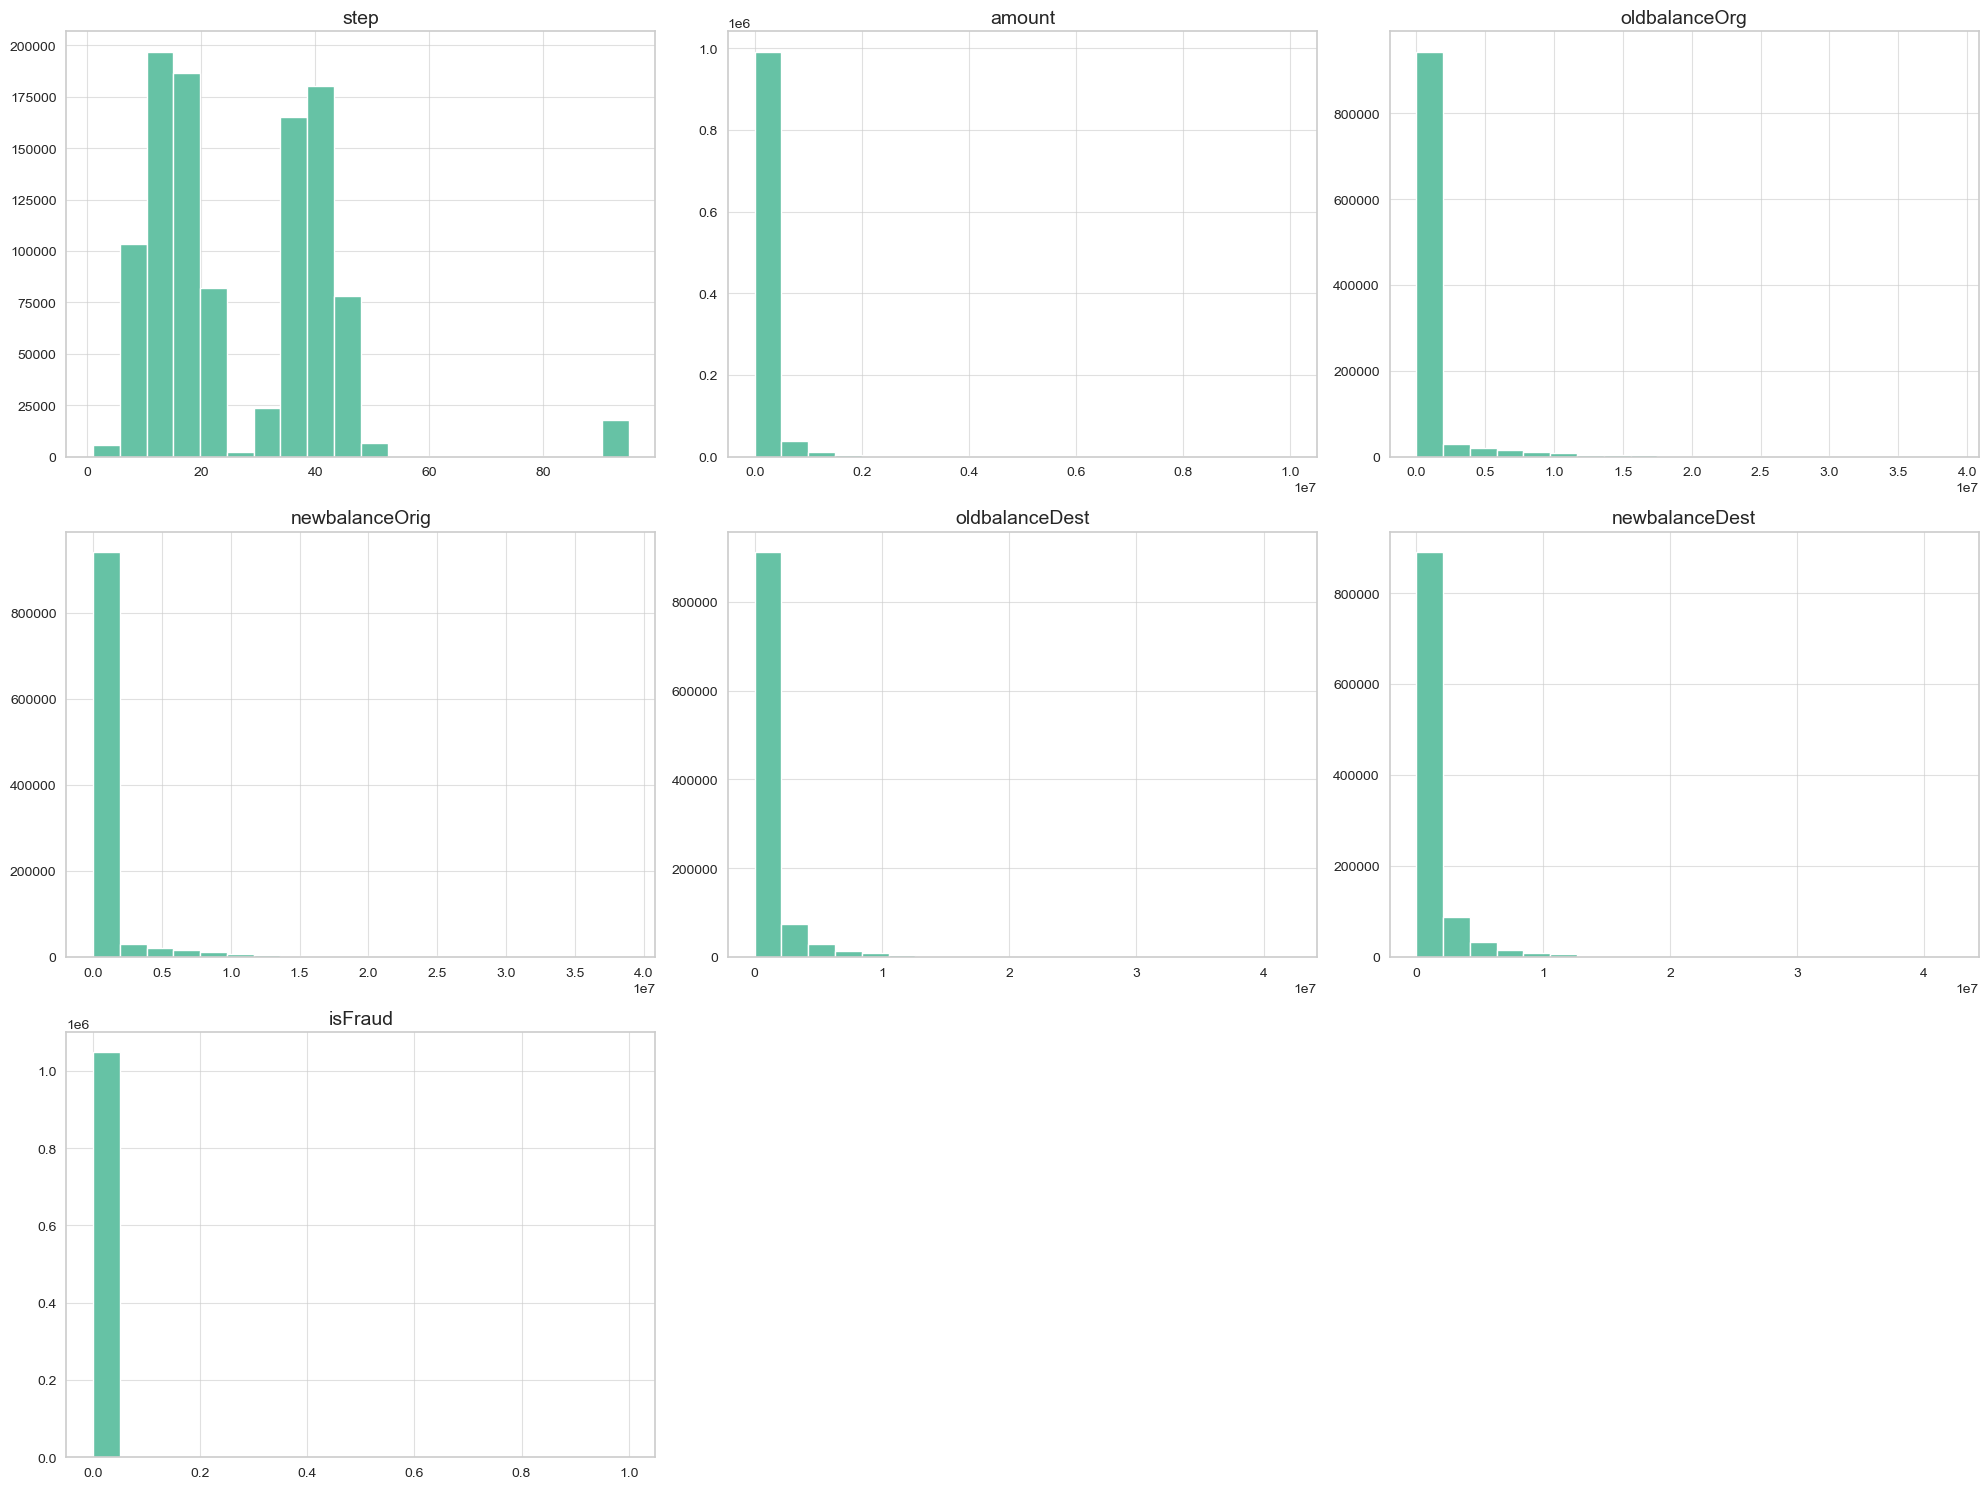

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data_with_nulls = pd.read_csv("Fraud_Dataset.csv")

# Drop the non-numeric columns
numeric_data = data_with_nulls.drop(columns=['type', 'nameOrig', 'nameDest'])

# Generate histograms for all numeric columns
numeric_data.hist(figsize=(20, 15),   bins=20)
plt.tight_layout()
plt.show()

##### Boxplot with null values

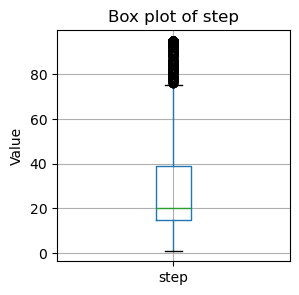

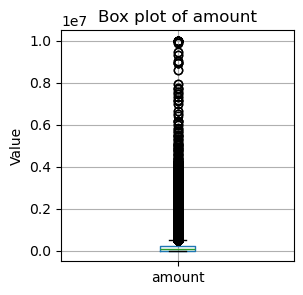

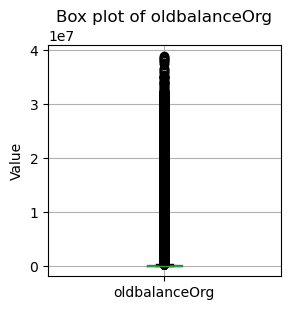

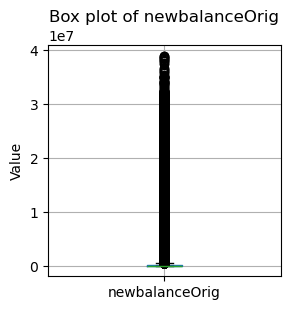

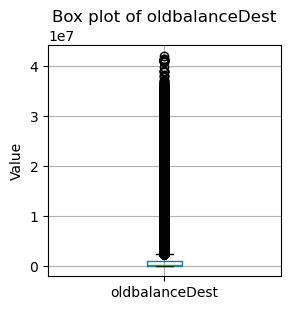

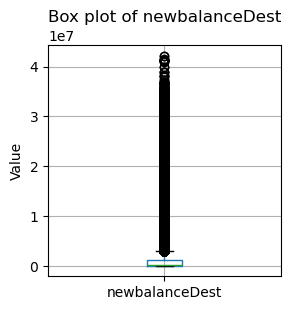

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical attributes to plot
numerical_attributes = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Generate box plots for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(3, 3))
    data_with_nulls.boxplot(column=attribute)
    plt.title(f'Box plot of {attribute}')
    plt.ylabel('Value')
    plt.show()

##### Bar Chart with NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048504 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB
None


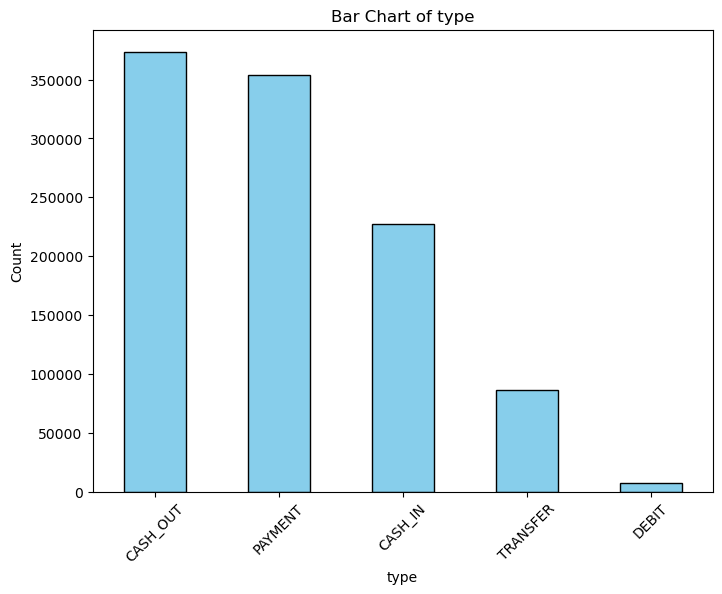

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
data=pd.read_csv("Fraud_Dataset.csv")

# Display basic information about the dataset
print(data.info())  

# Identify categorical columns
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()

# Check if categorical attributes exist before plotting
if not categorical_attributes:
    print("No categorical attributes found in the dataset.")
else:
    # Generate bar charts for categorical attributes
    for attribute in categorical_attributes:
        plt.figure(figsize=(8, 6))
        data[attribute].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

##### Skewness before removing null values

In [1]:
import pandas as pd

fraud_data = pd.read_csv("Fraud_Dataset.csv")

numerical_data = fraud_data.select_dtypes(include=['float64', 'int64'])

skewness = numerical_data.skew()

print("Skewness of numerical attributes:")
print(skewness)

Skewness of numerical attributes:
step               1.294455
amount             6.374166
oldbalanceOrg      5.124286
newbalanceOrig     5.060456
oldbalanceDest     5.373195
newbalanceDest     5.012421
isFraud           30.252198
dtype: float64


#### Removing null values

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

fraud_data = pd.read_csv("Fraud_Dataset.csv")

# Loop through columns in fraud_data
for column in fraud_data.columns:
    if fraud_data[column].dtype == 'float64':
        mean_val = fraud_data[column].mean()
        median_val = fraud_data[column].median()
        skewness = fraud_data[column].skew()

        if abs(skewness) < 0.5:
            fraud_data[column] = fraud_data[column].fillna(mean_val)
        else:
            fraud_data[column] = fraud_data[column].fillna(median_val)
    elif fraud_data[column].dtype == 'object':
        mode_val = fraud_data[column].mode()[0]
        fraud_data[column] = fraud_data[column].fillna(mode_val)

print(fraud_data)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19384.72  M2044282225           

#### After replacing with null values

In [3]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

#### Skewness after replacing null values

In [4]:
import pandas as pd

# Load the dataset 
data = pd.read_csv("Fraud_Dataset.csv")

# Use only the first 10,000 rows to reduce load
sample_data = data.head(10000)

# Calculate skewness before filling missing values
numeric_cols = sample_data.select_dtypes(include=['float64', 'int64'])
print("Skewness before imputation:")
print(numeric_cols.skew())

# Replace missing values using mean
sample_data_filled = sample_data.fillna(numeric_cols.mean())

# Calculate skewness after filling missing values
print("\nSkewness after imputation:")
print(sample_data_filled.select_dtypes(include=['float64', 'int64']).skew())

Skewness before imputation:
step              -0.159536
amount            13.668385
oldbalanceOrg      2.756778
newbalanceOrig     2.715473
oldbalanceDest     3.904458
newbalanceDest     3.598959
isFraud           12.004537
dtype: float64

Skewness after imputation:
step              -0.159536
amount            13.668385
oldbalanceOrg      2.756778
newbalanceOrig     2.715473
oldbalanceDest     3.904458
newbalanceDest     3.605996
isFraud           12.004537
dtype: float64


### Before removing outliers

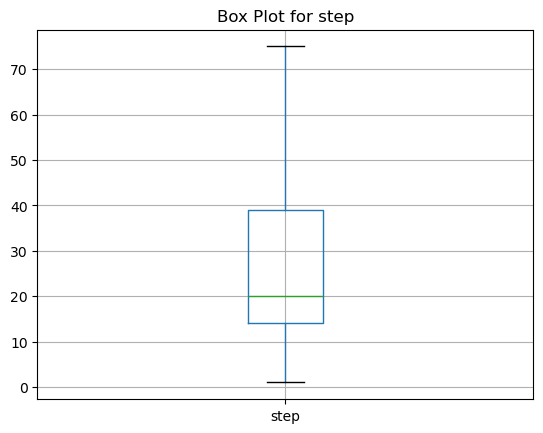

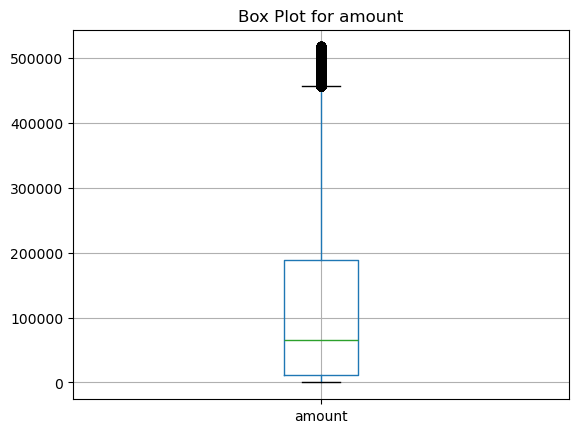

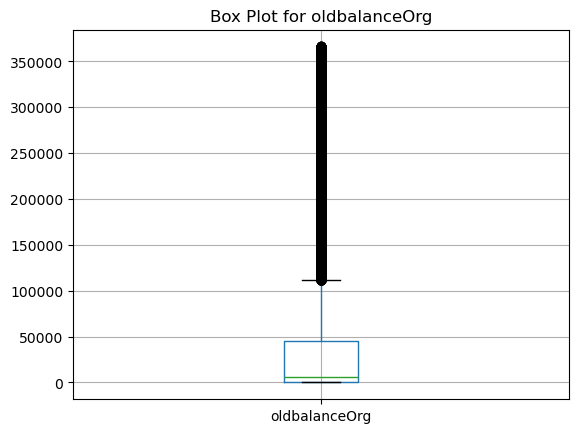

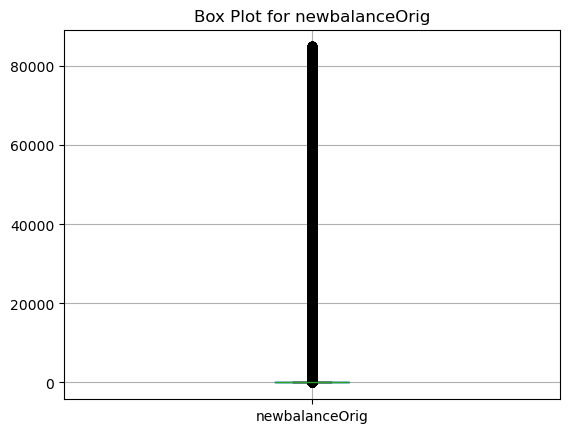

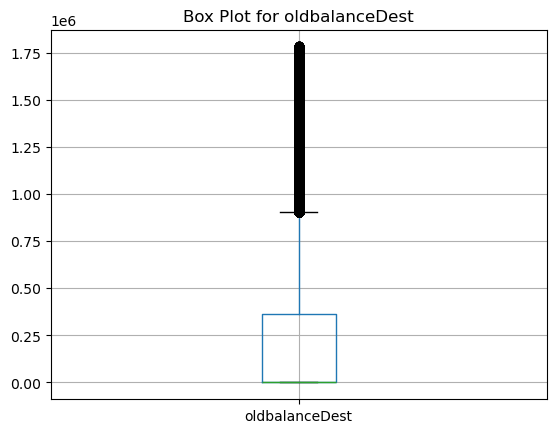

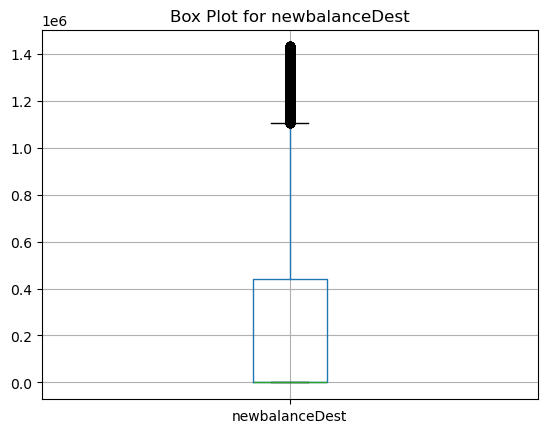

         step      type     amount     nameOrig  oldbalanceOrg  \
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
5           1   PAYMENT    7817.71    C90045638       53860.00   
8           1   PAYMENT    4024.36  C1265012928        2671.00   
...       ...       ...        ...          ...            ...   
1030580    74  CASH_OUT   59813.61  C1784961866       59813.61   
1030581    74  TRANSFER  158489.29  C1694745551      158489.29   
1030582    74  CASH_OUT  158489.29  C1003023037      158489.29   
1030583    74  TRANSFER   85637.08  C1809932675       85637.08   
1030584    74  CASH_OUT   85637.08   C588765630       85637.08   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
1              19384.72  M2044282225            0.00            0.00        0  
2                  0.00   C553264065           

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical columns 
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Load the dataset
train_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# Loop through each numerical column to check for outliers
for col in num_cols:
    Q1 = train_preprocessed[col].quantile(0.25)
    Q3 = train_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    train_preprocessed = train_preprocessed[(train_preprocessed[col] >= lower_bound) & (train_preprocessed[col] <= upper_bound)]

    # Plot the boxplot for the column
    train_preprocessed.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

# Print the cleaned dataset 
print(train_preprocessed)

###  After removing outliers

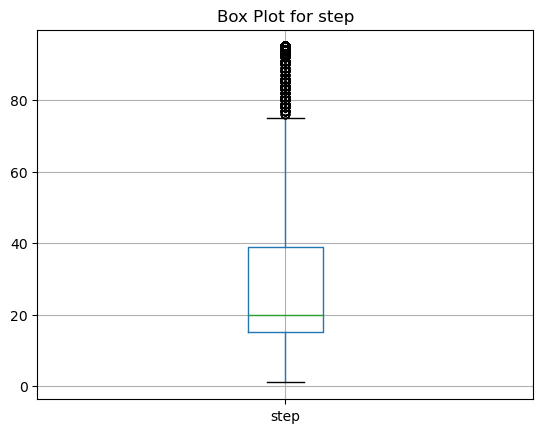

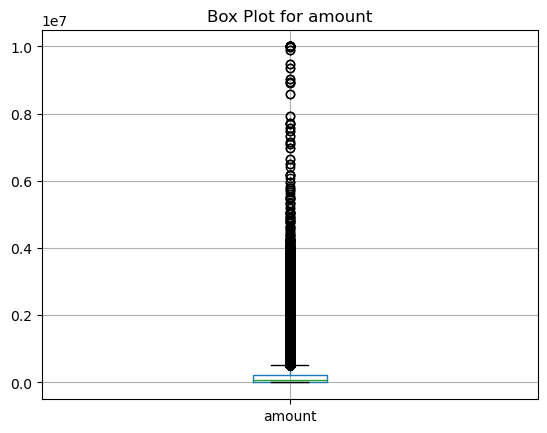

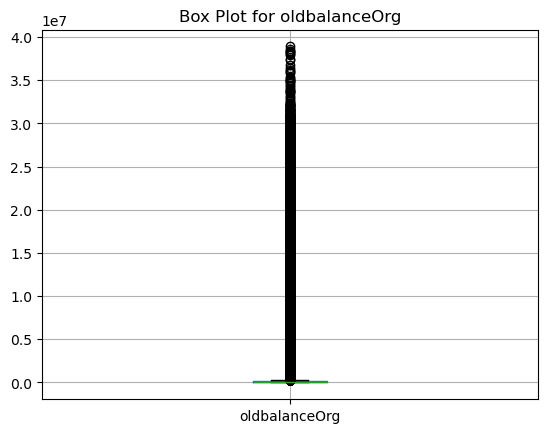

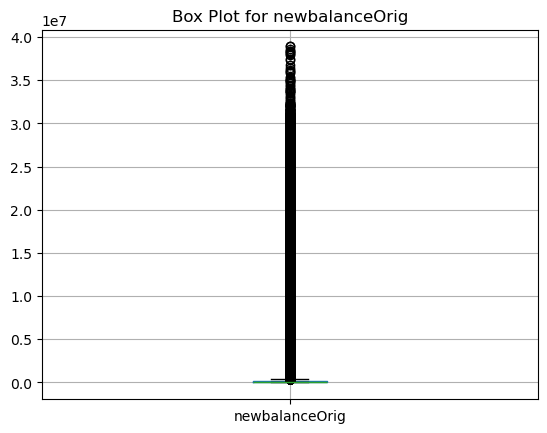

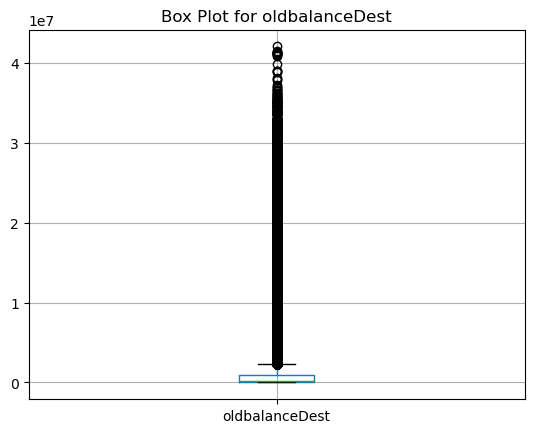

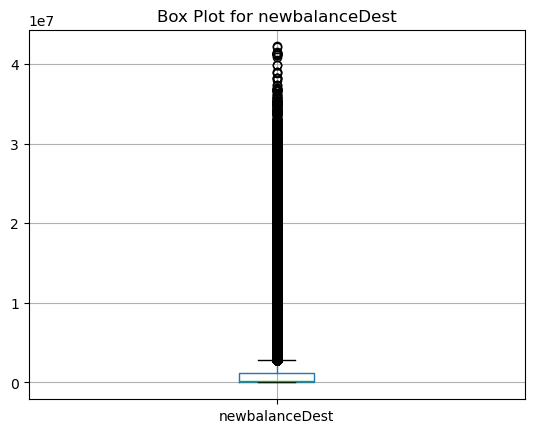

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# List of numerical columns 
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Load the dataset
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

for col in num_cols:
    Q1=train_outliers_preprocessed[col].quantile(0.25)
    Q3=train_outliers_preprocessed[col].quantile(0.75)
    IQR=Q3-Q1
    train_outliers_preprocessed.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

### Wrangle (Data normalization)

Data normalization is a preprocessing technique used in data science and machine learning to scale the features of a dataset to a similar range. Normalization transforms the data so that it has a mean of 0 and a standard deviation of 1 or scales it to a specific range. The goal is to bring all features to a comparable scale, which can improve the performance of machine learning algorithms, particularly those sensitive to feature scales, such as gradient descent-based optimization algorithms.

Purpose of Data Normalization:
Feature Scaling: Normalization ensures that all features have the same scale, preventing some features from dominating others in the learning process. It's essential for algorithms that rely on distance metrics or gradient-based optimization.

Convergence Speed: Normalized data can lead to faster convergence during the training process, especially for algorithms like gradient descent, as it helps to avoid zigzagging due to differing feature scales.

Improved Performance: Normalization can improve the performance and accuracy of machine learning models, particularly for models like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks, which are sensitive to feature scales.


What Scale Is Used?
The StandardScaler standardizes data using the Z-score normalization formula:

X′=X−μ/σ


 
Where:

X
X is the original value.
μ
μ is the mean of the feature.
σ
σ is the standard deviation of the feature.
X
′
X 
′
  is the standardized value.
After applying this transformation, the new values will have:

A mean (μ) of 0.
A standard deviation (σ) of 1.
The data will be centered around 0, but it is not bound to a fixed range like [0,1].
​
 
Sklearn implementation: Z score


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# List of numeric columns
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

train_preprocessed_no_outliers = train_preprocessed.copy()

# Remove outliers using IQR for each column
for col in num_cols:
    Q1 = train_preprocessed_no_outliers[col].quantile(0.25)
    Q3 = train_preprocessed_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data for outliers
    train_preprocessed_no_outliers = train_preprocessed_no_outliers[(train_preprocessed_no_outliers[col] >= lower_bound) & 
                                                                    (train_preprocessed_no_outliers[col] <= upper_bound)]

# Standardizing the numeric columns
scaler = StandardScaler()
train_preprocessed_no_outliers[num_cols] = scaler.fit_transform(train_preprocessed_no_outliers[num_cols])

# Print the standardized data
print(train_preprocessed_no_outliers)

             step      type    amount     nameOrig  oldbalanceOrg  \
1       -1.930432   PAYMENT -0.751361  C1666544295       0.031703   
2       -1.930432  TRANSFER -0.765911  C1305486145      -0.523960   
4       -1.930432   PAYMENT -0.666621  C2048537720       0.567242   
5       -1.930432   PAYMENT -0.699902    C90045638       0.891809   
8       -1.930432   PAYMENT -0.732690  C1265012928      -0.458287   
...           ...       ...       ...          ...            ...   
1030580  3.654996  CASH_OUT -0.250474  C1784961866       1.048834   
1030581  3.654996  TRANSFER  0.602432  C1694745551       3.651379   
1030582  3.654996  CASH_OUT  0.602432  C1003023037       3.651379   
1030583  3.654996  TRANSFER -0.027268  C1809932675       1.729921   
1030584  3.654996  CASH_OUT -0.027268   C588765630       1.729921   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
1              0.678705  M2044282225       -0.584004       -0.697352        0  
2          

In [8]:
print(train_outliers_preprocessed)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19384.72  M2044282225           

In [9]:
stats = train_outliers_preprocessed.describe()
print(stats)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048504e+06  1.048575e+06  
mean     9.781600e+05    1.114172e+06  1.089097e-03  
std      2.296780e+06    2.416338e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.263772e+05    2.182928e+05  0.000000e+00  
75%      

### Correlation Analysis

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# Initialize the label encoder
label_encoder = LabelEncoder()

# Copy the dataset to avoid modifying the original data
train_outliers_encoded = train_outliers_preprocessed.copy()

# Encoding the Nominal Attributes
train_outliers_encoded['type'] = label_encoder.fit_transform(train_outliers_encoded['type'])
train_outliers_encoded['nameOrig'] = label_encoder.fit_transform(train_outliers_encoded['nameOrig'])
train_outliers_encoded['nameDest'] = label_encoder.fit_transform(train_outliers_encoded['nameDest'])

# The numeric attributes do not need encoding, but we will use them in the correlation matrix
# Binary attribute 'isFraud' is already numeric, so no need for encoding

# Calculate and print the correlation matrix
correlation_matrix = train_outliers_encoded.corr()
print(correlation_matrix)

                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.015992 -0.025996 -0.000252      -0.006780   
type            0.015992  1.000000  0.042118 -0.000420      -0.339142   
amount         -0.025996  0.042118  1.000000  0.001649       0.004864   
nameOrig       -0.000252 -0.000420  0.001649  1.000000       0.000102   
oldbalanceOrg  -0.006780 -0.339142  0.004864  0.000102       1.000000   
newbalanceOrig -0.007180 -0.351602 -0.001133  0.000143       0.999047   
nameDest        0.015275  0.586477 -0.340864 -0.001146      -0.160207   
oldbalanceDest -0.002251 -0.166134  0.215558  0.001736       0.093305   
newbalanceDest -0.019463 -0.127148  0.311850  0.001866       0.064068   
isFraud         0.045030  0.018859  0.128862  0.000030       0.003829   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.007180  0.015275       -0.002251       -0.019463   
type                 -0.351602  0.586477    

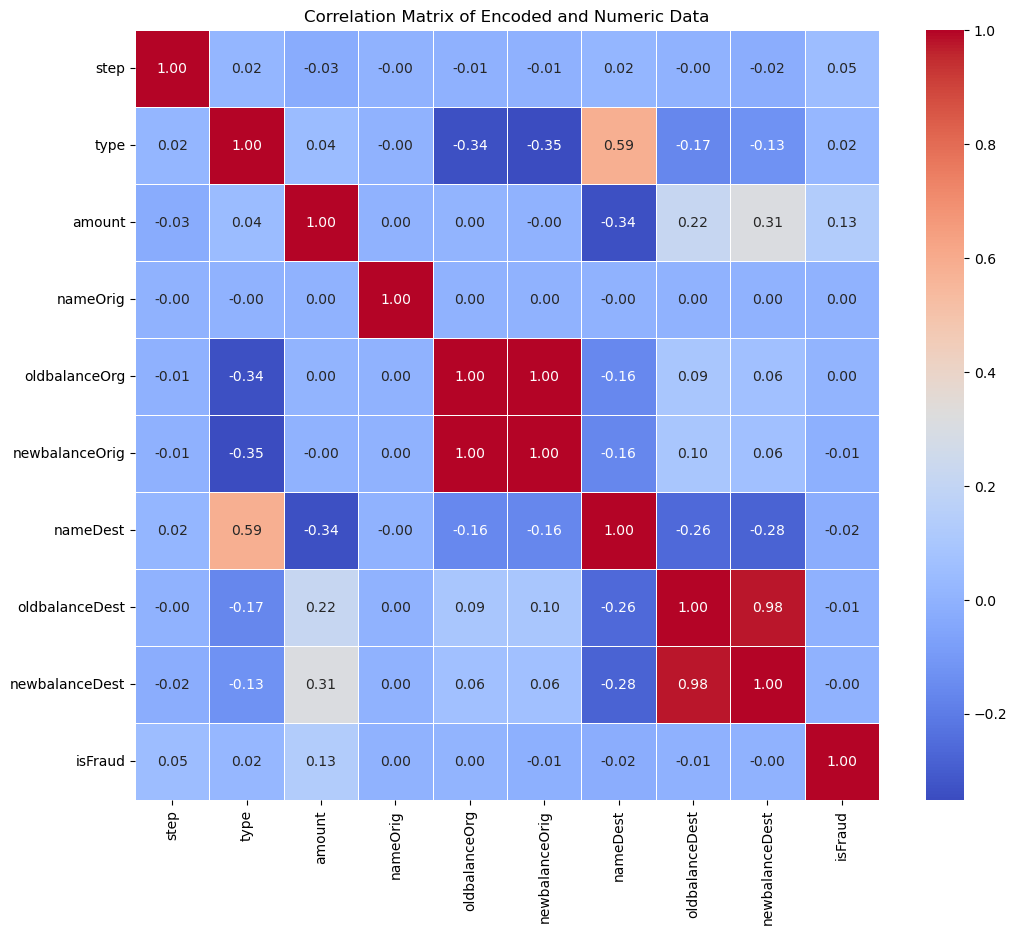

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# Initialize the label encoder
label_encoder = LabelEncoder()

# Copy the dataset to avoid modifying the original data
train_outliers_encoded = train_outliers_preprocessed.copy()

# Encoding the Nominal Attributes
train_outliers_encoded['type'] = label_encoder.fit_transform(train_outliers_encoded['type'])
train_outliers_encoded['nameOrig'] = label_encoder.fit_transform(train_outliers_encoded['nameOrig'])
train_outliers_encoded['nameDest'] = label_encoder.fit_transform(train_outliers_encoded['nameDest'])

# Calculate and print the correlation matrix
correlation_matrix = train_outliers_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Encoded and Numeric Data')
plt.show()

#### Correlation using Pearsons method

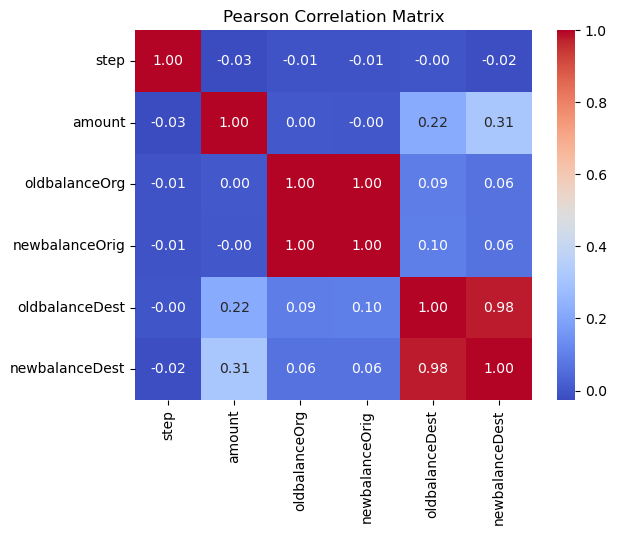

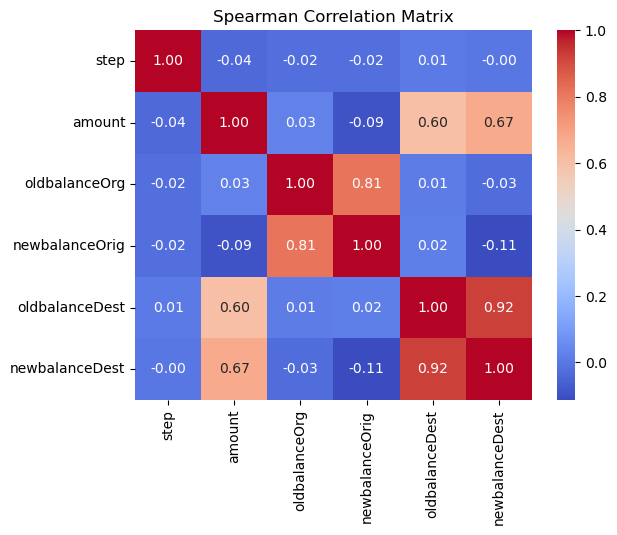

Point-Biserial Correlation between 'amount' and 'isFraud': 0.1288622278532114
Chi-Square Test for 'type' and 'isFraud': Chi2 = 3049.025198919036, p-value = 0.0
Chi-Square Test for 'nameOrig' and 'isFraud': Chi2 = 1048575.0000000006, p-value = 0.4288447334561494
Chi-Square Test for 'nameDest' and 'isFraud': Chi2 = 515776.5632721579, p-value = 0.0


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr, chi2_contingency
import numpy as np

# Load dataset
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
train_outliers_encoded = train_outliers_preprocessed.copy()
train_outliers_encoded['type'] = label_encoder.fit_transform(train_outliers_encoded['type'])
train_outliers_encoded['nameOrig'] = label_encoder.fit_transform(train_outliers_encoded['nameOrig'])
train_outliers_encoded['nameDest'] = label_encoder.fit_transform(train_outliers_encoded['nameDest'])

# Continuous variables
continuous_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                      'oldbalanceDest', 'newbalanceDest']

# Categorical variables (encoded)
categorical_columns = ['type', 'nameOrig', 'nameDest', 'isFraud']

# --- Pearson Correlation for continuous variables ---
pearson_corr = train_outliers_encoded[continuous_columns].corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

# --- Spearman Correlation for continuous variables ---
spearman_corr = train_outliers_encoded[continuous_columns].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

# --- Point-Biserial Correlation between continuous and binary target 'isFraud' ---
corr_amount_isfraud, _ = pointbiserialr(train_outliers_encoded['amount'], train_outliers_encoded['isFraud'])
print(f"Point-Biserial Correlation between 'amount' and 'isFraud': {corr_amount_isfraud}")

# --- Chi-Square Test for categorical variables with 'isFraud' ---
contingency_type = pd.crosstab(train_outliers_encoded['type'], train_outliers_encoded['isFraud'])
chi2_type, p_type, _, _ = chi2_contingency(contingency_type)
print(f"Chi-Square Test for 'type' and 'isFraud': Chi2 = {chi2_type}, p-value = {p_type}")

contingency_nameOrig = pd.crosstab(train_outliers_encoded['nameOrig'], train_outliers_encoded['isFraud'])
chi2_nameOrig, p_nameOrig, _, _ = chi2_contingency(contingency_nameOrig)
print(f"Chi-Square Test for 'nameOrig' and 'isFraud': Chi2 = {chi2_nameOrig}, p-value = {p_nameOrig}")

contingency_nameDest = pd.crosstab(train_outliers_encoded['nameDest'], train_outliers_encoded['isFraud'])
chi2_nameDest, p_nameDest, _, _ = chi2_contingency(contingency_nameDest)
print(f"Chi-Square Test for 'nameDest' and 'isFraud': Chi2 = {chi2_nameDest}, p-value = {p_nameDest}")

#### Correlation analysis between age and other attributes

In [11]:
import pandas as pd

# List of attributes to check the correlation with 'isFraud'
fraud_detection_attributes = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 
                              'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

# Loop through each attribute to check correlation with 'isFraud'
for attribute in fraud_detection_attributes:
    # Check if the column exists in the dataset and is numeric 
    if attribute in train_outliers_preprocessed.columns and train_outliers_preprocessed[attribute].dtype != 'object':
        # Calculate Pearson correlation between 'isFraud' and the current attribute
        corr_with_isFraud = train_outliers_preprocessed['isFraud'].corr(train_outliers_preprocessed[attribute], method='pearson')
        print(f"Pearson correlation coefficient between {attribute} and 'isFraud': {corr_with_isFraud}")
    else:
        print(f"Column '{attribute}' does not exist or is not numeric.")

Pearson correlation coefficient between step and 'isFraud': 0.045030191074235656
Column 'type' does not exist or is not numeric.
Pearson correlation coefficient between amount and 'isFraud': 0.1288622278532096
Column 'nameOrig' does not exist or is not numeric.
Pearson correlation coefficient between oldbalanceOrg and 'isFraud': 0.003829187848249284
Pearson correlation coefficient between newbalanceOrig and 'isFraud': -0.009438069815669713
Column 'nameDest' does not exist or is not numeric.
Pearson correlation coefficient between oldbalanceDest and 'isFraud': -0.007551844500893797
Pearson correlation coefficient between newbalanceDest and 'isFraud': -0.0004954096112730854
Pearson correlation coefficient between isFraud and 'isFraud': 1.0


#### Pearsons coefficient with each attribute

In [14]:
import pandas as pd

# Load your dataset
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# Encode categorical variables before calculating correlation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_outliers_preprocessed['type'] = label_encoder.fit_transform(train_outliers_preprocessed['type'])
train_outliers_preprocessed['nameOrig'] = label_encoder.fit_transform(train_outliers_preprocessed['nameOrig'])
train_outliers_preprocessed['nameDest'] = label_encoder.fit_transform(train_outliers_preprocessed['nameDest'])

# Selecting only numeric columns for correlation calculation
numeric_columns = train_outliers_preprocessed.select_dtypes(include=['number']).columns

# Calculate the Pearson correlation matrix for all numeric columns
correlation_matrix = train_outliers_preprocessed[numeric_columns].corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.015992 -0.025996 -0.000252      -0.006780   
type            0.015992  1.000000  0.042118 -0.000420      -0.339142   
amount         -0.025996  0.042118  1.000000  0.001649       0.004864   
nameOrig       -0.000252 -0.000420  0.001649  1.000000       0.000102   
oldbalanceOrg  -0.006780 -0.339142  0.004864  0.000102       1.000000   
newbalanceOrig -0.007180 -0.351602 -0.001133  0.000143       0.999047   
nameDest        0.015275  0.586477 -0.340864 -0.001146      -0.160207   
oldbalanceDest -0.002251 -0.166134  0.215558  0.001736       0.093305   
newbalanceDest -0.019463 -0.127148  0.311850  0.001866       0.064068   
isFraud         0.045030  0.018859  0.128862  0.000030       0.003829   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.007180  0.015275       -0.002251       -0.019463   
type                 -0.351602  0.586477    

#### Chi-Square test for nominal attributes

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset (adjust path to your file)
train_outliers_preprocessed = pd.read_csv("Fraud_Dataset.csv")

# List of categorical (nominal) attributes
categorical_attributes = ['type', 'nameOrig', 'nameDest', 'isFraud']

# Perform Chi-Square Test for each categorical attribute with respect to 'isFraud'
for attribute in categorical_attributes:
    if attribute != 'isFraud':  # Avoid comparing 'isFraud' to itself
        # Create a contingency table to compare the categorical variable with 'isFraud'
        contingency_table = pd.crosstab(train_outliers_preprocessed[attribute], train_outliers_preprocessed['isFraud'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for '{attribute}' and 'isFraud':")
        print(f"Chi-Square Statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")
        print(f"Expected frequencies:\n{expected}\n")

Chi-Square Test for 'type' and 'isFraud':
Chi-Square Statistic: 3049.025198919036
P-value: 0.0
Degrees of freedom: 4
Expected frequencies:
[[2.26882633e+05 2.47366626e+02]
 [3.73234069e+05 4.06931333e+02]
 [7.17018246e+03 7.81753904e+00]
 [3.53487598e+05 3.85402061e+02]
 [8.66585176e+04 9.44824414e+01]]

Chi-Square Test for 'nameOrig' and 'isFraud':
Chi-Square Statistic: 1048575.0000000006
P-value: 0.4288447334561494
Degrees of freedom: 1048316
Expected frequencies:
[[0.9989109 0.0010891]
 [0.9989109 0.0010891]
 [0.9989109 0.0010891]
 ...
 [0.9989109 0.0010891]
 [0.9989109 0.0010891]
 [0.9989109 0.0010891]]

Chi-Square Test for 'nameDest' and 'isFraud':
Chi-Square Statistic: 515776.5632721579
P-value: 0.0
Degrees of freedom: 449634
Expected frequencies:
[[8.99019813e+00 9.80187397e-03]
 [9.98910903e-01 1.08909711e-03]
 [2.99673271e+00 3.26729132e-03]
 ...
 [9.98910903e-01 1.08909711e-03]
 [9.98910903e-01 1.08909711e-03]
 [9.98910903e-01 1.08909711e-03]]



### Hypothesis

#### Hypothesis 1:  Large Transactions Are More Likely to Be Fraudulent
Reasoning: Fraudulent transactions might involve unusually large amounts of money, often exceeding normal transaction sizes.

Test: Compare the distribution of amount for fraudulent and non-fraudulent transactions

Description: This visualization shows the distribution of transaction amounts for both fraudulent and non-fraudulent transactions. If fraudulent transactions tend to have higher amounts, we can infer that large transactions are more likely to be fraudulent.

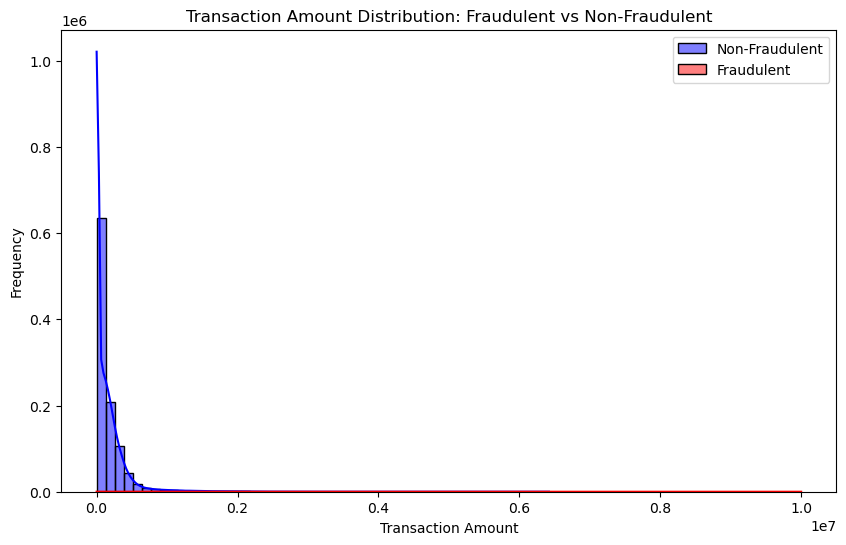

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data['isFraud'] == 0]['amount'], color='blue', kde=True, label='Non-Fraudulent', bins=50)
sns.histplot(data[data['isFraud'] == 1]['amount'], color='red', kde=True, label='Fraudulent', bins=50)
plt.title('Transaction Amount Distribution: Fraudulent vs Non-Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Hypothesis 2:  Balances Before and After Transaction May Differ for Fraudulent Transactions
Reasoning: Fraudulent transactions may involve abrupt or drastic changes in balances, while legitimate transactions might have more stable balance shifts.

Test: Compare the difference in balances (newbalanceOrig - oldbalanceOrig and newbalanceDest - oldbalanceDest) for fraudulent vs non-fraudulent transactions..

Description: This box plot compares the balance differences between the origin and destination accounts for fraudulent and non-fraudulent transactions. If fraudulent transactions show larger or more erratic changes in balances, this could be a key feature for fraud detection.

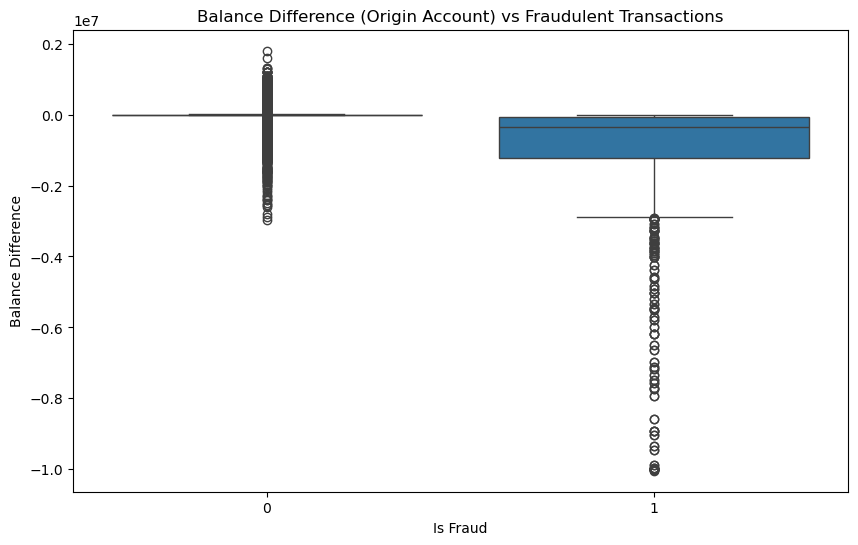

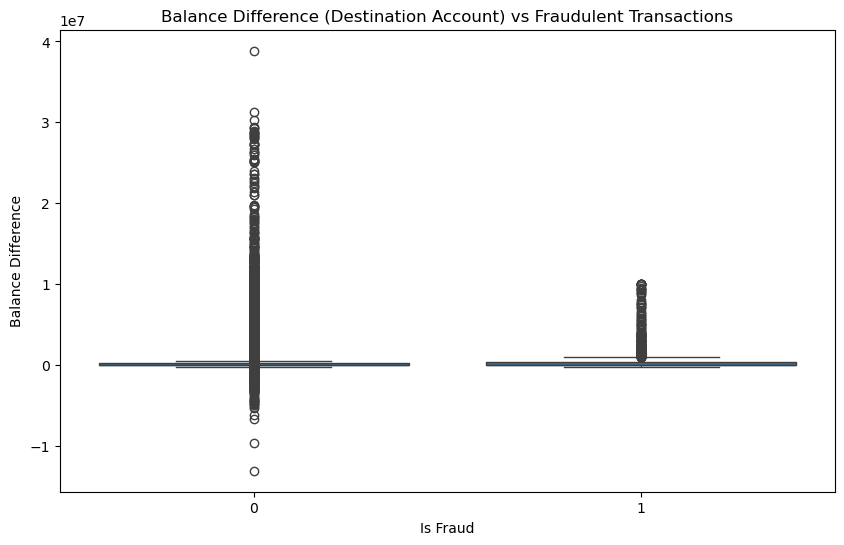

In [15]:
# Calculate balance differences for the origin and destination accounts
data['orig_balance_diff'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['dest_balance_diff'] = data['newbalanceDest'] - data['oldbalanceDest']

# Plot balance differences for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='isFraud', y='orig_balance_diff')
plt.title('Balance Difference (Origin Account) vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Difference')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='isFraud', y='dest_balance_diff')
plt.title('Balance Difference (Destination Account) vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Difference')
plt.show()

#### Hypothesis 3: Fraudulent transactions are more common on specific days (e.g., weekends)
Description: Certain days of the week may see higher fraud rates, possibly due to reduced banking oversight or increased transaction activity.

Fraud rate by day of the week:
day
0    0.000951
1    0.001151
2    0.001095
3    0.001115
4    0.001290
5    0.000966
6    0.001073
Name: isFraud, dtype: float64 



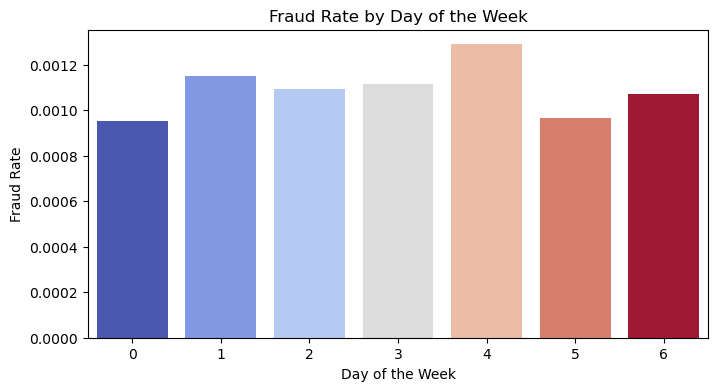

In [16]:
data['day'] = data['step'] % 7
fraud_rate_by_day = data.groupby('day')['isFraud'].mean()
print("Fraud rate by day of the week:")
print(fraud_rate_by_day, "\n")

plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_rate_by_day.index, y=fraud_rate_by_day.values, hue=fraud_rate_by_day.index, dodge=False, palette='coolwarm', legend=False)
plt.title("Fraud Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Fraud Rate")
plt.show()

#### Hypothesis 4: Accounts Involved in Fraud Have More Transactions in a Short Time Period
Reasoning: Fraudulent accounts may show patterns of rapid or frequent transactions, often in bursts.

Test: Identify accounts (nameOrig, nameDest) that show multiple transactions within short time frames and examine their association with fraud.

Descriptiion: 
1. Fraudulent Accounts - If fraudulent accounts tend to have more transactions in short time periods, you would expect to see a shift to the right in the histogram for fraudulent accounts (indicating higher transaction counts).
The boxplot for fraudulent accounts will likely have a higher median and larger spread, indicating that fraudulent accounts often show bursts of transaction activity.
2. Non-Fraudulent Accounts Non-fraudulent accounts are expected to show less frequent bursts of transactions over short time periods, leading to a lower frequency of transactions in the histogram and a lower median in the boxplot.
The spread of transaction counts for non-fraudulent accounts will likely be narrower.

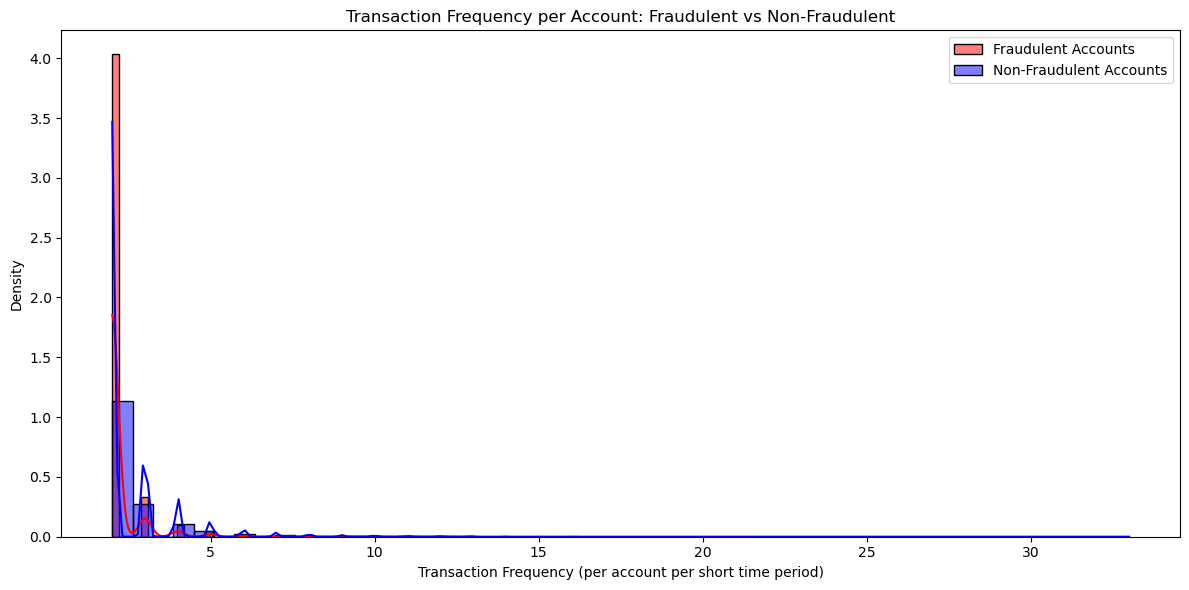

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to track the number of transactions per account within a short time period
data['transaction_count'] = data.groupby(['nameOrig', 'step'])['nameOrig'].transform('count') + \
                            data.groupby(['nameDest', 'step'])['nameDest'].transform('count')

# Step 2: Calculate the frequency of transactions for fraudulent vs non-fraudulent accounts
fraudulent_transactions = data[data['isFraud'] == 1]
non_fraudulent_transactions = data[data['isFraud'] == 0]

# Calculate transaction frequency per account
fraudulent_counts = fraudulent_transactions.groupby('nameOrig')['transaction_count'].max()
non_fraudulent_counts = non_fraudulent_transactions.groupby('nameOrig')['transaction_count'].max()

# Step 3: Plot histogram to visualize the frequency of transactions for fraudulent vs non-fraudulent accounts
plt.figure(figsize=(12, 6))

# Plot for fraudulent accounts
sns.histplot(fraudulent_counts, color='red', kde=True, label='Fraudulent Accounts', bins=50, stat='density')

# Plot for non-fraudulent accounts
sns.histplot(non_fraudulent_counts, color='blue', kde=True, label='Non-Fraudulent Accounts', bins=50, stat='density')

plt.title('Transaction Frequency per Account: Fraudulent vs Non-Fraudulent')
plt.xlabel('Transaction Frequency (per account per short time period)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

#### Hypothesis 5: The Amount of Money Transferred Is Correlated with Fraud

Reasoning: Larger amounts being transferred between accounts might indicate fraudulent activity, especially when compared to normal transfer amounts.

Test: Investigate whether there’s a correlation between transaction amount and fraud (isFraud).

Description: 
1. Boxplot: If fraudulent transactions involve larger amounts, you may see the fraudulent boxplot shifting to higher amounts compared to non-fraudulent transactions. Additionally, fraudulent transactions might have more outliers or a wider spread.
2. T-test: If the p-value < 0.05, it indicates that the difference in transaction amounts between fraudulent and non-fraudulent transactions is statistically significant, suggesting that fraudulent transactions tend to involve larger or smaller amounts.
3. Conclusion: If the hypothesis is true and the t-test shows a significant difference, this would support the idea that larger transaction amounts are correlated with fraud, which could help inform fraud detection models.

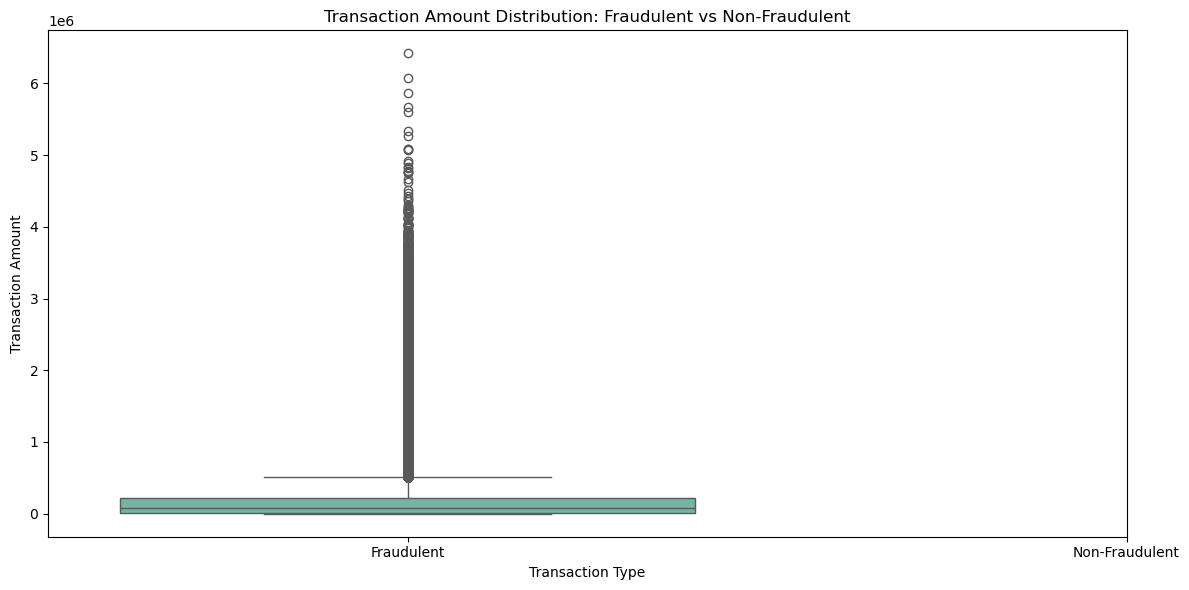

T-statistic: 17.225942301466606
P-value: 2.7555379698534314e-59
There is a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Separate the data into fraudulent and non-fraudulent transactions
fraudulent_transactions = data[data['isFraud'] == 1]
non_fraudulent_transactions = data[data['isFraud'] == 0]

# Step 2: Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))

# Boxplot to compare the transaction amounts for fraudulent vs non-fraudulent transactions
sns.boxplot(data=[fraudulent_transactions['amount'], non_fraudulent_transactions['amount']], palette='Set2')

# Title and labels for the plot
plt.title('Transaction Amount Distribution: Fraudulent vs Non-Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')

# Labeling x-axis categories (0 for fraudulent, 1 for non-fraudulent)
plt.xticks([0, 1], ['Fraudulent', 'Non-Fraudulent'])

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Step 3: Perform a t-test to check if there is a significant difference in transaction amounts
t_stat, p_value = stats.ttest_ind(fraudulent_transactions['amount'], non_fraudulent_transactions['amount'], equal_var=False)

# Output the t-test result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("There is a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.")
else:
    print("There is no significant difference in transaction amounts between fraudulent and non-fraudulent transactions.")


#### Hypothesis 6: Fraudulent transactions are more common in high-volume transaction periods
Description: Transactions made during peak hours may have higher fraud rates due to a larger number of transactions occurring, making fraudulent ones harder to detect.

Fraud rate by hour of the day:
hour
0     0.003362
1     0.009059
2     0.032389
3     0.055285
4     0.044750
5     0.043541
6     0.026159
7     0.006695
8     0.002460
9     0.000767
10    0.000941
11    0.000813
12    0.000803
13    0.000769
14    0.000740
15    0.000676
16    0.000651
17    0.000564
18    0.000770
19    0.000394
20    0.000505
21    0.001353
22    0.001551
23    0.002861
Name: isFraud, dtype: float64 



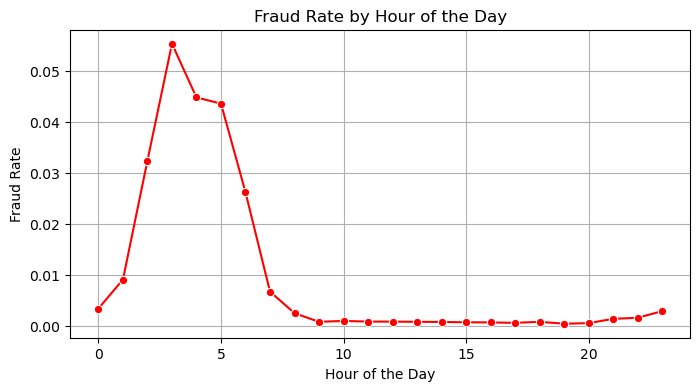

In [19]:
data['hour'] = data['step'] % 24
fraud_rate_by_hour = data.groupby('hour')['isFraud'].mean()
print("Fraud rate by hour of the day:")
print(fraud_rate_by_hour, "\n")

plt.figure(figsize=(8, 4))
sns.lineplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, marker='o', color='red')
plt.title("Fraud Rate by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Rate")
plt.grid()
plt.show()

#### Hypothesis 7: Do fraudulent transactions occur more often than non-fraudulent transactions?
Description: The pie chart will show the proportion of fraudulent vs non-fraudulent transactions. If the fraudulent portion is larger, it indicates fraud is more frequent in the dataset. If the non-fraudulent portion is larger, non-fraudulent transactions dominate, suggesting fraud is rare.

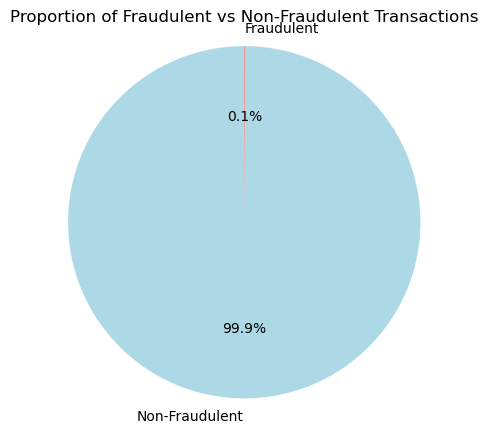

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count the number of fraudulent and non-fraudulent transactions
fraud_counts = data['isFraud'].value_counts()

# Step 2: Plot a pie chart to visualize the proportion of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal') 
plt.show()

#### Hypothesis 8: Certain transaction types have higher fraud rates
 Description: Some types of transactions, such as 'TRANSFER' and 'CASH_OUT', are more frequently associated with fraudulent activities.

Fraud rate by transaction type:
type
CASH_IN     0.000000
CASH_OUT    0.001547
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.006501
Name: isFraud, dtype: float64 



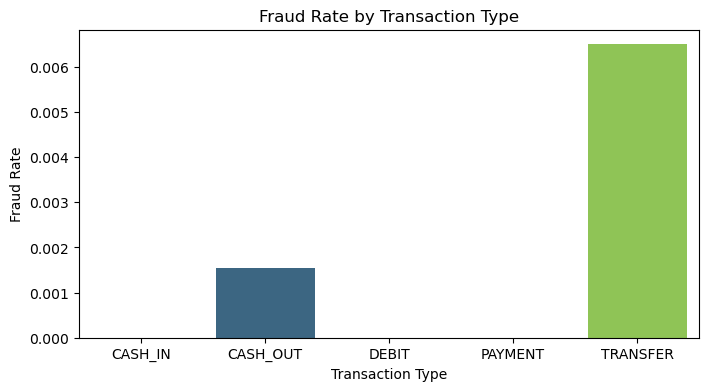

In [21]:
fraud_rate_by_type = data.groupby('type')['isFraud'].mean()
print("Fraud rate by transaction type:")
print(fraud_rate_by_type, "\n")

plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, hue=fraud_rate_by_type.index, dodge=False, palette='viridis', legend=False)
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

#### Hypothesis 9: Fraudulent transactions tend to have a higher rate of outliers in transaction amounts.
Description : If fraudulent transactions have more outliers or larger outliers, it indicates that fraud is more likely to involve unusually large or small amounts. This can help refine fraud detection models by focusing on transaction amounts that deviate significantly from normal ranges.The result suggests that non-fraudulent transactions have a much higher number of outliers compared to fraudulent transactions, indicating that outliers in transaction amounts are more commonly associated with non-fraudulent transactions in your dataset. This challenges the hypothesis that fraudulent transactions tend to have a higher rate of outliers.

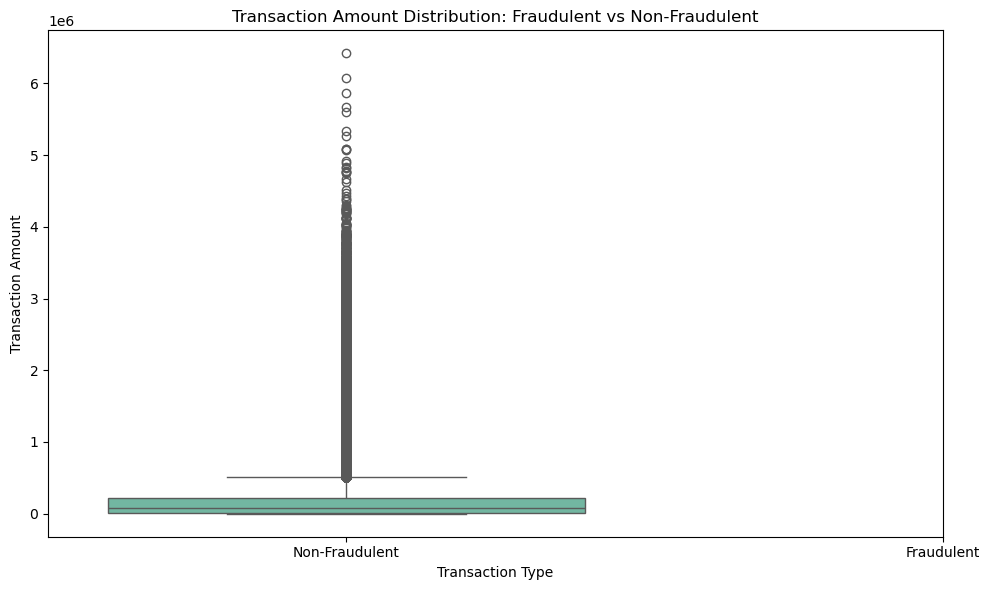

Number of fraudulent transactions with outliers: 463
Number of non-fraudulent transactions with outliers: 52625


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split the data into fraudulent and non-fraudulent transactions
fraudulent_transactions = data[data['isFraud'] == 1]
non_fraudulent_transactions = data[data['isFraud'] == 0]

# Step 2: Plot a boxplot to compare the transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(data=[fraudulent_transactions['amount'], non_fraudulent_transactions['amount']], palette='Set2')

# Title and labels for the plot
plt.title('Transaction Amount Distribution: Fraudulent vs Non-Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')

# Labeling x-axis categories (0 for non-fraudulent, 1 for fraudulent)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Optional: Checking the outliers in the data
# Define outlier condition (values outside of 1.5 IQR)
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outliers for fraudulent and non-fraudulent transactions
fraudulent_outliers = fraudulent_transactions[(fraudulent_transactions['amount'] < lower_bound) | 
                                             (fraudulent_transactions['amount'] > upper_bound)]
non_fraudulent_outliers = non_fraudulent_transactions[(non_fraudulent_transactions['amount'] < lower_bound) | 
                                                     (non_fraudulent_transactions['amount'] > upper_bound)]

# Print outliers count for each group
print(f"Number of fraudulent transactions with outliers: {len(fraudulent_outliers)}")
print(f"Number of non-fraudulent transactions with outliers: {len(non_fraudulent_outliers)}")

#### Hypothesis 10: Fraudulent transactions often involve individuals rather than merchants

In [23]:
fraud_rate_by_dest_type = data.groupby(data['nameDest'].str.startswith('M'))['isFraud'].mean()
print("Fraud rate based on destination type (Merchant vs. Individual):")
print(fraud_rate_by_dest_type, "\n")

Fraud rate based on destination type (Merchant vs. Individual):
nameDest
False    0.001644
True     0.000000
Name: isFraud, dtype: float64 

